## Rede neural artificial - Regressão Linear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Base de dados :

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df = df.drop('id',axis=1)

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Feature Engineering :

In [7]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)

df['year'] = df['date'].apply(lambda date:date.year)

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='month'>

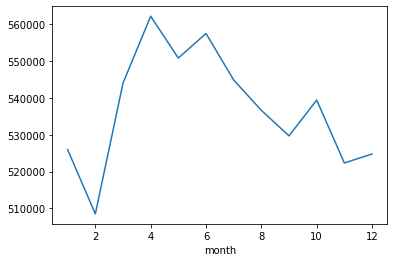

In [9]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

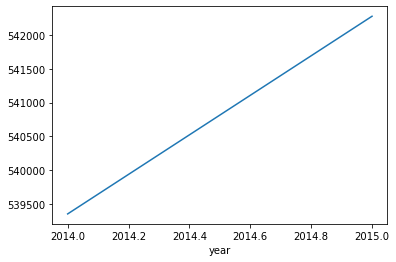

In [10]:
df.groupby('year').mean()['price'].plot()

In [11]:
df = df.drop('date',axis=1)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [12]:
df = df.drop('zipcode',axis=1)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,47.560093,-122.213982,1986.620318,12758.283512,6.573969,2014.322962
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,0.138552,0.140724,685.230472,27274.441950,3.115061,0.467619
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


## Treinamento e teste :

In [14]:
X = df.drop('price',axis=1)
y = df['price']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Normalização das features :

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train= scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_train.shape

(15117, 19)

In [22]:
X_test.shape

(6480, 19)

## Desenvolvimento da RNA :

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [24]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Treinamento do modelo :

In [25]:
model.fit(x = X_train,y = y_train.values,
          validation_data = (X_test,y_test.values),
          batch_size = 128,epochs = 400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430229880832.0000 - val_loss: 418853126144.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428480266240.0000 - val_loss: 413040934912.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 406887038976.0000 - val_loss: 365518880768.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 312934006784.0000 - val_loss: 223873318912.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 158724866048.0000 - val_loss: 104494292992.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 100993384448.0000 - val_loss: 95175999488.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97531502592.0000 - val_loss: 93593780224.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95815720960.0000 - val_loss: 91991834624.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 37972639744.0000 - val_loss: 36684193792.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 37766033408.0000 - val_loss: 36491849728.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 37635350528.0000 - val_loss: 36333731840.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37423501312.0000 - val_loss: 36284878848.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 37309685760.0000 - val_loss: 36046864384.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 37153107968.0000 - val_loss: 35922821120.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 37055037440.0000 - val_loss: 35763204096.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 36919812096.0000 - val_loss: 35627331584.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 32844720128.0000 - val_loss: 31386845184.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32778790912.0000 - val_loss: 31350685696.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32764422144.0000 - val_loss: 31254691840.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32739549184.0000 - val_loss: 31209934848.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32678838272.0000 - val_loss: 31161325568.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32653230080.0000 - val_loss: 31128352768.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32643796992.0000 - val_loss: 31119175680.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32613480448.0000 - val_loss: 31055343616.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31409336320.0000 - val_loss: 29606795264.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31396864000.0000 - val_loss: 29639962624.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31375452160.0000 - val_loss: 29579446272.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 31373180928.0000 - val_loss: 29702359040.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31369777152.0000 - val_loss: 29616814080.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 31323609088.0000 - val_loss: 29607178240.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31280840704.0000 - val_loss: 29562142720.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31273965568.0000 - val_loss: 29484259328.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 30582515712.0000 - val_loss: 28641189888.0000
Epoch 268/400
119/119 [==============================] - 0s 4ms/step - loss: 30546704384.0000 - val_loss: 28629792768.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30560069632.0000 - val_loss: 28569612288.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30508439552.0000 - val_loss: 28568569856.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30521239552.0000 - val_loss: 28604368896.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30503995392.0000 - val_loss: 28550037504.0000
Epoch 273/400
119/119 [==============================] - 1s 5ms/step - loss: 30540261376.0000 - val_loss: 28505329664.0000
Epoch 274/400
119/119 [==============================] - 0s 4ms/step - loss: 30487457792.0000 - val_loss: 28502431744.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29974487040.0000 - val_loss: 27853735936.0000
Epoch 334/400
119/119 [==============================] - 1s 5ms/step - loss: 29977155584.0000 - val_loss: 27903254528.0000
Epoch 335/400
119/119 [==============================] - 1s 5ms/step - loss: 29959002112.0000 - val_loss: 27856164864.0000
Epoch 336/400
119/119 [==============================] - 1s 6ms/step - loss: 29970933760.0000 - val_loss: 27798353920.0000
Epoch 337/400
119/119 [==============================] - 1s 5ms/step - loss: 29940555776.0000 - val_loss: 27780661248.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 29950674944.0000 - val_loss: 27764600832.0000
Epoch 339/400
119/119 [==============================] - 1s 4ms/step - loss: 29931323392.0000 - val_loss: 27797821440.0000
Epoch 340/400
119/119 [==============================] - 1s 4ms/step - loss: 29918590976.0000 - val_loss: 27803580416.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29306478592.0000 - val_loss: 27014717440.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29290500096.0000 - val_loss: 26980358144.0000


In [26]:
losses = pd.DataFrame(model.history.history)

In [27]:
losses.head()

,loss,val_loss
0,4.302299e+11,4.188531e+11
1,4.284803e+11,4.130409e+11
2,4.068870e+11,3.655189e+11
3,3.129340e+11,2.238733e+11
4,1.587249e+11,1.044943e+11


<AxesSubplot:>

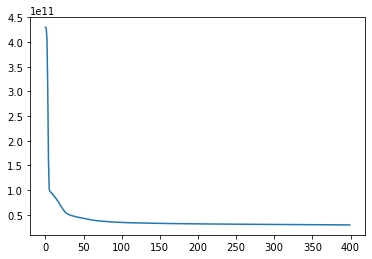

In [28]:
losses['loss'].plot()

## Validação do modelo :

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [30]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [31]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [32]:
mean_absolute_error(y_test,predictions)

101283.09797694831

In [33]:
np.sqrt(mean_squared_error(y_test,predictions))

164257.00086115327

In [34]:
explained_variance_score(y_test,predictions)

0.7965600286110427

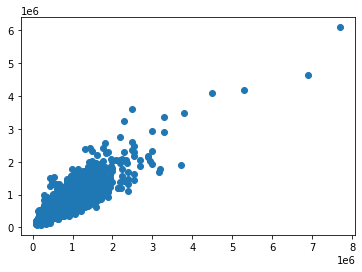

In [35]:
plt.scatter(y_test,predictions)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

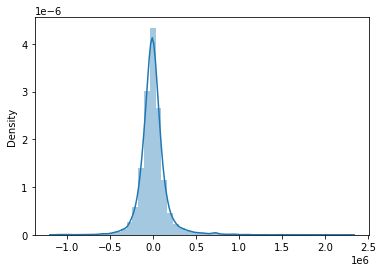

In [36]:
errors = y_test.values.reshape(6480, 1) - predictions

sns.distplot(errors)

## Estimando um novo dado de entrada :

In [37]:
novo_dado = df.drop('price',axis=1).iloc[0] # retirado da propria base de dados para fins didaticos

novo_dado = scaler.transform(novo_dado.values.reshape(-1, 19))

novo_dado

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [38]:
(model.predict(novo_dado))[0][0]

1/1 [==============================] - 0s 22ms/step


279702.75

In [39]:
df.iloc[0][0] #valor real do novo dado

221900.0